In [7]:
#DEEP LEARNING libraries
import tensorflow as tf

#IMAGE PROCESSING & READING libraries
import cv2
from glob import glob
import os

#ARRAY OPERATION libraries
import random
import numpy as np  

#OTHER OPERATIONS libraires
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

In [8]:
#Connecting DATASET folder shortcut to import
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [9]:
#Reading images & importing complete DATASET

#Path to the folder containing Traing Images
trainSet = '/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images/'

#Listing all the images to create an array
trainImagesPath = glob(trainSet + '*.png')
#Creating the list of Image IDs to map their Binary masks(Output)
trainIDs = os.listdir('/content/drive/MyDrive/MoNuSeg-Training-Data/Tissue-Images')

#Removing extra images that are not compatible or don`t have output
trainIDs = trainIDs[:30]

#Loading Images into List
trainImages = []
for path in trainImagesPath:
    img = imread(path)
    img = img.astype('uint8')
    trainImages.append(img)

#Printing Train images IDs
trainIDs

# https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6

['TCGA-18-5592-01Z-00-DX1.png',
 'TCGA-A7-A13E-01Z-00-DX1.png',
 'TCGA-50-5931-01Z-00-DX1.png',
 'TCGA-21-5786-01Z-00-DX1.png',
 'TCGA-21-5784-01Z-00-DX1.png',
 'TCGA-49-4488-01Z-00-DX1.png',
 'TCGA-38-6178-01Z-00-DX1.png',
 'TCGA-AY-A8YK-01A-01-TS1.png',
 'TCGA-B0-5698-01Z-00-DX1.png',
 'TCGA-A7-A13F-01Z-00-DX1.png',
 'TCGA-AR-A1AS-01Z-00-DX1.png',
 'TCGA-AR-A1AK-01Z-00-DX1.png',
 'TCGA-B0-5711-01Z-00-DX1.png',
 'TCGA-CH-5767-01Z-00-DX1.png',
 'TCGA-B0-5710-01Z-00-DX1.png',
 'TCGA-E2-A14V-01Z-00-DX1.png',
 'TCGA-E2-A1B5-01Z-00-DX1.png',
 'TCGA-DK-A2I6-01A-01-TS1.png',
 'TCGA-G9-6348-01Z-00-DX1.png',
 'TCGA-G9-6336-01Z-00-DX1.png',
 'TCGA-G2-A2EK-01A-02-TSB.png',
 'TCGA-HE-7129-01Z-00-DX1.png',
 'TCGA-G9-6356-01Z-00-DX1.png',
 'TCGA-HE-7128-01Z-00-DX1.png',
 'TCGA-G9-6363-01Z-00-DX1.png',
 'TCGA-G9-6362-01Z-00-DX1.png',
 'TCGA-HE-7130-01Z-00-DX1.png',
 'TCGA-KB-A93J-01A-01-TS1.png',
 'TCGA-NH-A8F7-01A-01-TS1.png',
 'TCGA-RD-A8N9-01A-01-TS1.png']

In [10]:
#Repeating the above code to import Test Images

#Path to the folder containing Test Images
testSet = '/content/drive/MyDrive/MoNuSeg-Test-Data/Tissue-Images/'

#Listing all the images to create an array
Diceloss = 'binary_crossentropy'
testImagesPath = glob(testSet + '*.png')
#Creating the list of Image IDs to map their Binary masks(Output)
testIDs = os.listdir('/content/drive/MyDrive/MoNuSeg-Test-Data/Tissue-Images')

#Loading Images into List
testImages = []
for path in testImagesPath:
    img = imread(path)
    img = img.astype('uint8')
    testImages.append(img)

#Printing Train images IDs
testIDs

['TCGA-2Z-A9J9-01A-01-TS1.png',
 'TCGA-44-2665-01B-06-BS6.png',
 'TCGA-69-7764-01A-01-TS1.png',
 'TCGA-A6-6782-01A-01-BS1.png',
 'TCGA-AC-A2FO-01A-01-TS1.png',
 'TCGA-AO-A0J2-01A-01-BSA.png',
 'TCGA-CU-A0YN-01A-02-BSB.png',
 'TCGA-EJ-A46H-01A-03-TSC.png',
 'TCGA-FG-A4MU-01B-01-TS1.png',
 'TCGA-GL-6846-01A-01-BS1.png',
 'TCGA-HC-7209-01A-01-TS1.png',
 'TCGA-HT-8564-01Z-00-DX1.png',
 'TCGA-IZ-8196-01A-01-BS1.png',
 'TCGA-ZF-A9R5-01A-01-TS1.png']

In [11]:
#Creating Output images list for training and test in the same order

#Path to the folder containing Masks
maskTrain = '/content/drive/MyDrive/MoNuSeg-Training-Data/Binary-Mask/'
maskTest = '/content/drive/MyDrive/MoNuSeg-Test-Data/Binary-Mask/'

trainMasks =[]
testMasks = []

#Appending Mask images to respective lists 

for path in trainIDs:
    imagePath = os.path.join(maskTrain,path)
    img = imread(imagePath)
    img = img.astype('uint8')
    trainMasks.append(img)

for path in testIDs:
    imagePath = os.path.join(maskTest,path)
    img = imread(imagePath)
    img = img.astype('uint8')
    testMasks.append(img)

#Part 1:
Study the challenge statement of MoNuSeg challenge, read the data and display a few training and testingimages and their masks (black background, and a random color for each cell nucleus)

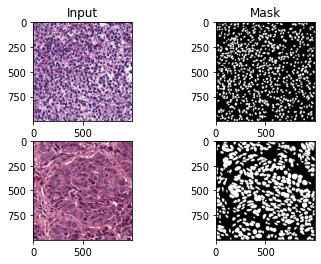

In [12]:
#Displaying few train images & masks


#Two columns and displaying 2 images
plt.subplot(2, 2,1)
plt.imshow(trainImages[1])
plt.title("Input")
plt.subplot(2, 2, 2)
plt.imshow(trainMasks[1],cmap = 'gray') #Gray image for masked image given in the dataset
plt.title("Mask")
plt.subplot(2, 2,3)
plt.imshow(trainImages[2])
plt.subplot(2, 2, 4)
plt.imshow(trainMasks[2],cmap = 'gray') ##Gray image for masked image given in the dataset

plt.show()

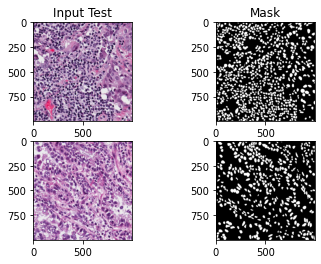

In [13]:
#Repeating above code to display Test IMAGES
#Displaying few test images & masks

plt.subplot(2, 2,1)
plt.imshow(testImages[1])
plt.title("Input Test")
plt.subplot(2, 2, 2)
plt.imshow(testMasks[1],cmap = 'gray') #Gray image for masked image given in the dataset
plt.title("Mask")
plt.subplot(2, 2,3)
plt.imshow(testImages[2])
plt.subplot(2, 2, 4)
plt.imshow(testMasks[2],cmap = 'gray') #Gray image for masked image given in the dataset

plt.show()

In [14]:
#Setting CONSTANTS for input images to MODEL
HEIGHT = 256
WIDTH = 256
CHANNELS = 3


#Creating function to divide 1 IMAGES of dim*dim = 1000* 1000
# to N = 16 Sub-Images of D*D = 256*256
d = 256 
N = 16
dim = 1000

def unpackImage(X_img,Y_img,X_Out,Y_Out):
    for n in range(len(X_img)):
        for i in range(3):
            for j in range(3):
                X_Out[n*16+i*4+j] = X_img[n][d*i:d*(i+1), d*j:d*(j+1),:]
                Y_Out[n*16+i*4+j] = Y_img[n][d*i:d*(i+1), d*j:d*(j+1)]
            X_Out[n*16+i*4+3] = X_img[n][d*i:d*(i+1), dim-d:dim,:]
            Y_Out[n*16+i*4+3] = Y_img[n][d*i:d*(i+1), dim-d:dim]
        X_Out[n*16+3*4+3] = X_img[n][dim-d:dim, dim-d:dim,:]
        Y_Out[n*16+3*4+3] = Y_img[n][dim-d:dim, dim-d:dim]

#This will give 4 IMAGES having some overloading 
#This will fill the X_out and Y_out with sub images
    

In [15]:
#Having np.array of dimensions for input of HEIGHT*WIDTH for training
X_train = np.zeros((len(trainImages)*N, HEIGHT , WIDTH, CHANNELS), dtype=np.uint8)
#Creating OUTPUT array of bool
Y_train = np.zeros((len(trainImages)*N, HEIGHT , WIDTH), dtype=np.bool)

#Having np.array of dimensions for input of HEIGHT*WIDTH for test
X_test = np.zeros((len(testImages)*N, HEIGHT , WIDTH, CHANNELS), dtype=np.uint8)
#Creating OUTPUT array of bool for test
Y_test = np.zeros((len(testImages)*N, HEIGHT , WIDTH), dtype=np.bool)

#Inserting array with small images from lists of train and test IMAGES
unpackImage(trainImages, trainMasks, X_train, Y_train)
unpackImage(testImages, testMasks, X_test, Y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


#Part 2: 
Code a basic UNet for semantic segmentation in TF+Keras or Pytorch for the binary nucleus vs. non-nucleussegmentation. You may leave a small margin of pixels all around the image from the output

In [16]:
def unetModel (lossFunction):

    #Build the model
    inputs = tf.keras.layers.Input((HEIGHT, WIDTH,CHANNELS))
    #Dividing by 255 by normalizing 
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs) 

    #Contraction path
    #With features = 16 for the first Layer & performing 2 time convulation
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    #Max pooling so new size is 128*128 and new features = 32
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
    #Max pooling so new size is 64*64 and new features = 64
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

    #Max pooling so new size is 32*32 and new features = 128
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
 
    #Expansion Path 
    #Now upsampling the block with SIZE = 64*64 transpose with stride = 2 and pooling size = 2*2
    u5 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c3])
    c6 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
    
    #Now upsampling the block  with SIZE 128*1278 with transpose with stride = 2 and pooling size = 2*2
    u6 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c6)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c7 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c7 = tf.keras.layers.Dropout(0.1)(c7)
    c7 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
    #Now upsampling the block with SIZE 256*256 transpose with stride = 2 and pooling size = 2*2
    u7 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c7)
    u7 = tf.keras.layers.concatenate([u7, c1], axis=3)
    c8 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c8)
 
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss = lossFunction, metrics=['accuracy'])
    model.summary()
    return model

#Reference : https://github.com/bnsreenu/python_for_microscopists/blob/master/074-Defining%20U-net%20in%20Python%20using%20Keras.py

In [17]:
#Modelcheckpoint

#To create file and logging callbacks to monitor val_loss
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_nuclei.h5', verbose=1, save_best_only=True)
callbacks = [ ]
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

#Using loss = "binary crossentropy" for Intial Model
model_Binary = unetModel('binary_crossentropy')
#Fitting training data with validation = 0.1 
results = model_Binary.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=1, callbacks=callbacks)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

#Part 3: 
Train the UNet using Dice loss, and show Dice score on validation and test data.

In [18]:
import keras.backend as K

#Generating DICELOSS function to provide it to UNET model
def DiceLoss(inputs, targets):
    
    #flatten label and prediction tensors
    inputs = K.flatten(inputs)/255
    targets = K.flatten(targets)/255

    targets = targets.astype(np.uint8)
    smooth=1e-6
    
    intersection = K.sum(K.dot(targets, inputs))
    dice = (2*intersection + smooth) / (K.sum(targets) + K.sum(inputs) + smooth)
    return 1 - dice

#https://www.kaggle.com/code/bigironsphere/loss-function-library-keras-pytorch/notebook

In [19]:
def DiceLoss(inputs, targets):
    
    #flatten label and prediction tensors
    inputs = K.flatten(inputs)/255.0
    targets = K.flatten(targets)
    targ = np.zeros(len(targets))
    for i in range(len(targets)):
      if targets[i] is True :
        targ[i] = 1
    # targets = targets.astype(np.uint8)
    smooth=1e-6
    
    intersection = K.sum(K.dot(targ, inputs))
    dice = (2*intersection + smooth) / (K.sum(targ) + K.sum(inputs) + smooth)
    return 1 - dice

In [20]:
#Changing Loss Function to Diceloss 
model_DiceLoss = unetModel(Diceloss)

#Training Model with new loss function
results = model_DiceLoss.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=1, callbacks=callbacks)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_1 (Lambda)              (None, 256, 256, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv2d_15 (Conv2D)             (None, 256, 256, 16  448         ['lambda_1[0][0]']               
                                )                                                                 
                                                                                            

In [21]:
def packImage(predImages):
    #Creating array of same size as of Original Image
    img = np.zeros((dim,dim))
    for i in range (3):
        for j in range(3):
            img[d*i:d*(i+1), d*j:d*(j+1)] = predImages[4*i+j][:,:,0]
        img[d*i:d*(i+1), dim-d: dim] = predImages[4*i+3][:,:,0]
    img[dim-d: dim, dim-d: dim] = predImages[4*3+3][:,:,0]
    #Filling it from sub image
    return img.astype(np.uint8)

def predImage(index,X_img):
    #Predicting Image from TRAINED MODEL
    predictions = model_Binary.predict(X_img[index*16:index*16 + 16],batch_size = 1)
    preds = (predictions > 0.27).astype(np.uint8)
    preds = preds*255
    preds.shape
    predImage = packImage(preds)
    return predImage

In [51]:
from google.colab.patches import cv2_imshow # for image display


#Taking random int from validation index
randVal = random.randint( len(trainImages)*0.9, len(trainImages))
predVal = predImage(randVal, X_train)

print('Dice score on random Val IMAGE')
print(DiceLoss(predVal, trainImages[randVal]))

ValueError: ignored

In [49]:
#Taking Random int to select for predicting Images


#Taking random int from test set
randTest = random.randint(0, len(testImages))
predTest = predImage(randTest, X_test)

print('Dice score on random test IMAGE')
print(DiceLoss(predTest, testImages[randTest]))

16/16 [==============================] - 3s 160ms/step
Dice score on random test IMAGE


TypeError: ignored

#Part -4 : 
Show a few output maps

Displaying Few predicted test Images


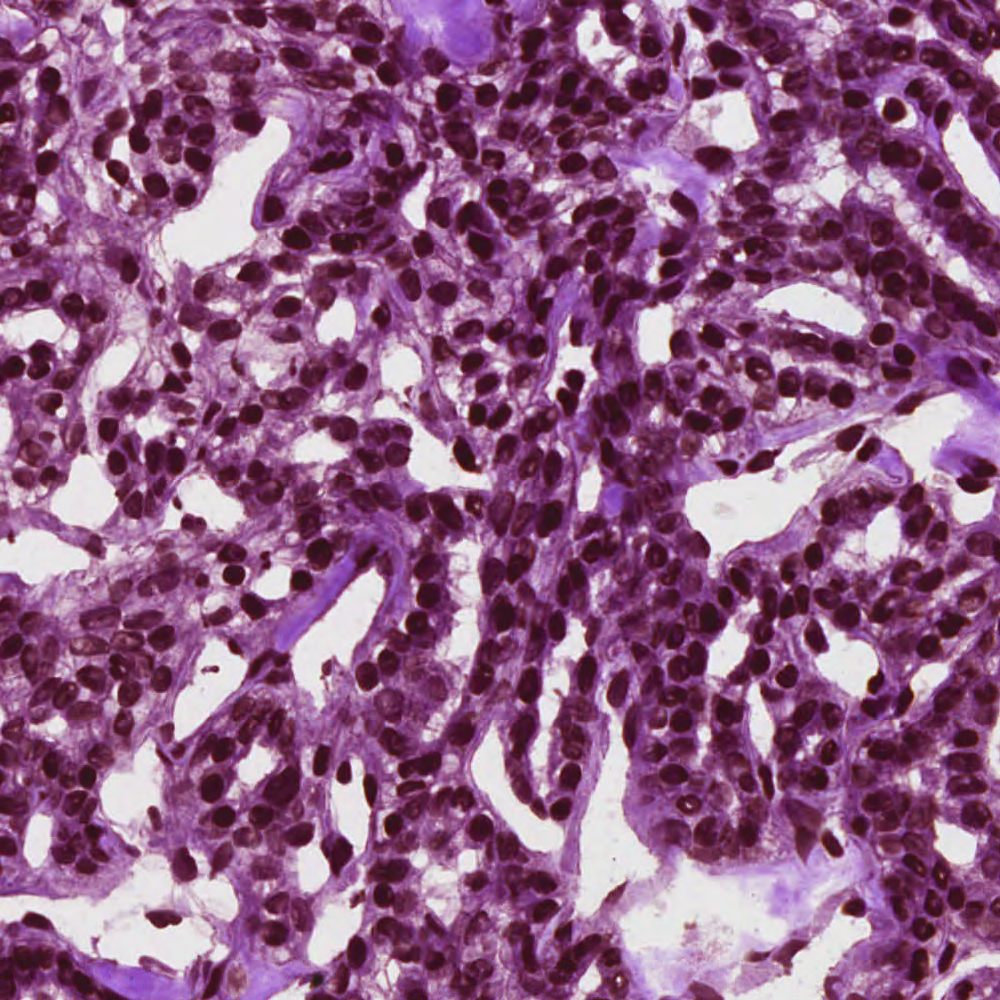

16/16 [==============================] - 3s 187ms/step


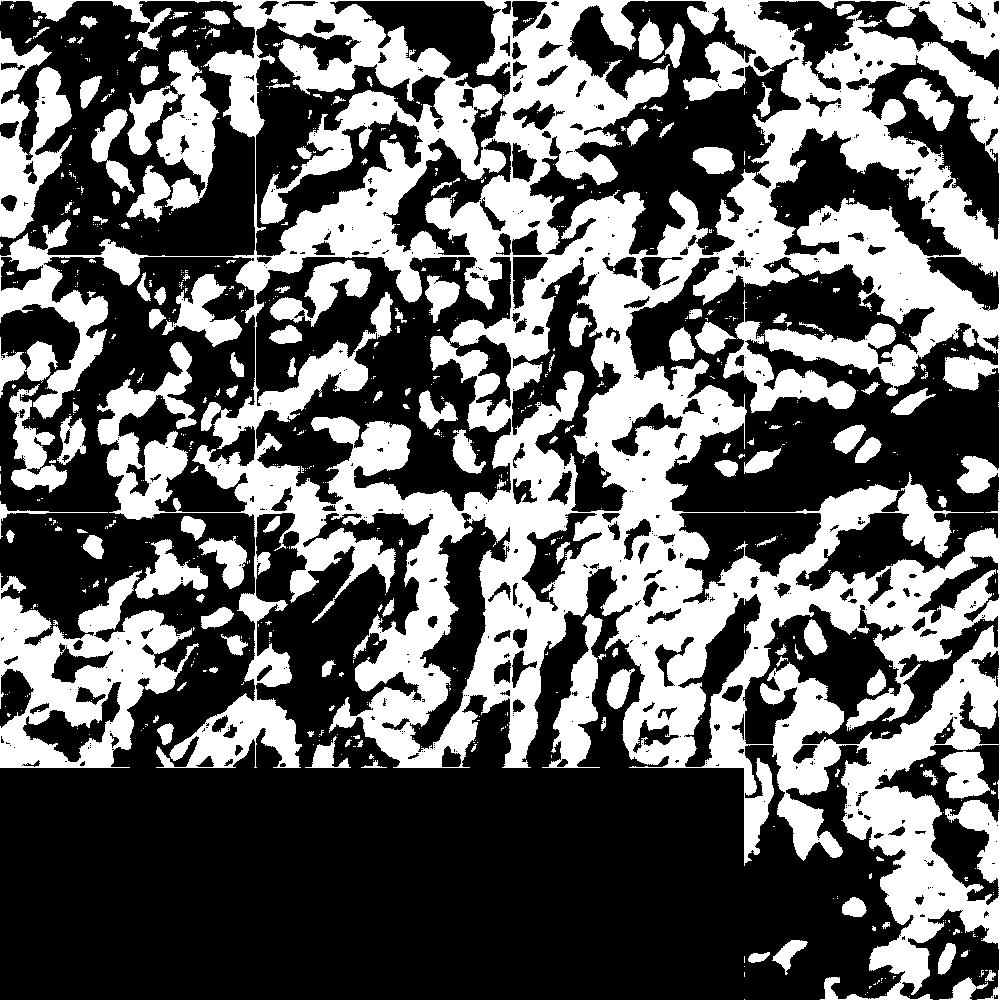

In [23]:
#Showing First predicted Images 
print('Displaying Few predicted test Images')
cv2_imshow(testImages[0])
cv2_imshow(predImage(0, X_test))

#Part 5:
(a) Number of blocks in the UNet architecture

In [24]:
#From the above model , increased no. of layers to increase no. of features in the layer
def unetModelIncBlocks (lossFunction):

    #Build the model
    inputs = tf.keras.layers.Input((HEIGHT, WIDTH,CHANNELS))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)
 
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = tf.keras.layers.Dropout(0.3)(c5)
    c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path 
    u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = tf.keras.layers.concatenate([u6, c4])
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
    u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = tf.keras.layers.concatenate([u7, c3])
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = tf.keras.layers.Dropout(0.2)(c7)
    c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
    u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = tf.keras.layers.concatenate([u8, c2])
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
    u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = tf.keras.layers.Dropout(0.1)(c9)
    c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
 
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss= lossFunction, metrics=['accuracy'])
    model.summary()
    return model

In [25]:
# Printing new MODEL results after increasing no. of blocks
model_incBlocks = unetModelIncBlocks('binary_crossentropy')
results = model_incBlocks.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=1, callbacks=callbacks)

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_2 (Lambda)              (None, 256, 256, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv2d_30 (Conv2D)             (None, 256, 256, 16  448         ['lambda_2[0][0]']               
                                )                                                                 
                                                                                            


 (b) Number of filters per layer in the UNet architecture 

In [26]:
#From the above model , decreassed  no. of features from above UNET model 
def unetModelDecFilters (lossFunction):

    #Build the model
    inputs = tf.keras.layers.Input((HEIGHT, WIDTH,CHANNELS))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
    c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
    c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
 
    #Expansion Path 
    u5 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c3])
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
    u6 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c6)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c7 = tf.keras.layers.Dropout(0.1)(c7)
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
    u7 = tf.keras.layers.Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c7)
    u7 = tf.keras.layers.concatenate([u7, c1], axis=3)
    c8 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c8)
 
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss = lossFunction, metrics=['accuracy'])
    model.summary()
    return model

In [27]:
# Printing new MODEL results after increasing no. of blocks
model_decFilters = unetModelDecFilters('binary_crossentropy')
results = model_decFilters.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=1, callbacks=callbacks)

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_3 (Lambda)              (None, 256, 256, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv2d_49 (Conv2D)             (None, 256, 256, 8)  224         ['lambda_3[0][0]']               
                                                                                                  
 dropout_23 (Dropout)           (None, 256, 256, 8)  0           ['conv2d_49[0][0]']        

(c) Loss function as a combination of Dice and MS-SSIM with a trade-off parameter

In [33]:
# Loss functtion with tradeoff Parameter

#Defined ssim loss new function first
def ssim_loss(y_true, y_pred):
  return tf.reduce_mean(tf.image.ssim(y_true, y_pred, 2.0))

TRADEOFF = 0

#As tradeoff increase, diceloss function weightage increase
def DiceandSSIM(y_true, y_pred):
    return TRADEOFF* DiceLoss(y_true,y_pred) + (1-TRADEOFF)* ssim_loss(y_true, y_pred, 2.0)

In [34]:
#This UNET model use new tradeoff loss function with parameter
def unetModelLossFunction(tradeoff):

    TRADEOFF = tradeoff
    lossFunction = DiceandSSIM

    #Build the model
    inputs = tf.keras.layers.Input((HEIGHT, WIDTH,CHANNELS))
    s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

    #Contraction path
    c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = tf.keras.layers.Dropout(0.1)(c1)
    c1 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

    c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = tf.keras.layers.Dropout(0.1)(c2)
    c2 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)
 
    c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = tf.keras.layers.Dropout(0.2)(c3)
    c3 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)
 
    c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = tf.keras.layers.Dropout(0.2)(c4)
    c4 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
 
    #Expansion Path 
    u5 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c4)
    u5 = tf.keras.layers.concatenate([u5, c3])
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u5)
    c6 = tf.keras.layers.Dropout(0.2)(c6)
    c6 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
 
    u6 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c6)
    u6 = tf.keras.layers.concatenate([u6, c2])
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c7 = tf.keras.layers.Dropout(0.1)(c7)
    c7 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
 
    u7 = tf.keras.layers.Conv2DTranspose(8, (2, 2), strides=(2, 2), padding='same')(c7)
    u7 = tf.keras.layers.concatenate([u7, c1], axis=3)
    c8 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c8 = tf.keras.layers.Dropout(0.1)(c8)
    c8 = tf.keras.layers.Conv2D(8, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)
 
    outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c8)
 
    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer='adam', loss = lossFunction, metrics=['accuracy'])
    model.summary()
    return model

In [47]:
# Printing new MODEL results after adding tradeoff parameter = 0.2
model_lossTradeoff = unetModelLossFunction(tradeoff = 0.2)
results = model_lossTradeoff.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=10, callbacks=callbacks)

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_9 (Lambda)              (None, 256, 256, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv2d_139 (Conv2D)            (None, 256, 256, 8)  224         ['lambda_9[0][0]']               
                                                                                                  
 dropout_65 (Dropout)           (None, 256, 256, 8)  0           ['conv2d_139[0][0]']       

TypeError: ignored

In [46]:
# Printing new MODEL results after adding tradeoff parameter = 0.5
model_lossTradeoff = unetModelLossFunction(tradeoff = 0.5)
results = model_lossTradeoff.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=10, callbacks=callbacks)

Model: "model_8"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_8 (Lambda)              (None, 256, 256, 3)  0           ['input_9[0][0]']                
                                                                                                  
 conv2d_124 (Conv2D)            (None, 256, 256, 8)  224         ['lambda_8[0][0]']               
                                                                                                  
 dropout_58 (Dropout)           (None, 256, 256, 8)  0           ['conv2d_124[0][0]']       

TypeError: ignored

In [45]:
# Printing new MODEL results after adding tradeoff parameter = 0.8
model_lossTradeoff = unetModelLossFunction(tradeoff = 0.8)
results = model_lossTradeoff.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=10, callbacks=callbacks)

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda_7 (Lambda)              (None, 256, 256, 3)  0           ['input_8[0][0]']                
                                                                                                  
 conv2d_109 (Conv2D)            (None, 256, 256, 8)  224         ['lambda_7[0][0]']               
                                                                                                  
 dropout_51 (Dropout)           (None, 256, 256, 8)  0           ['conv2d_109[0][0]']       

TypeError: ignored

#Part 6 :
Use watershed segmentation on the probability map produced by the UNet to segment individual nuclei,and show results on test images with touching or overlapping nuclei. Experiment with various parameters ofwatershed algorithms to try to improve the results

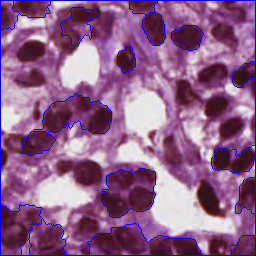

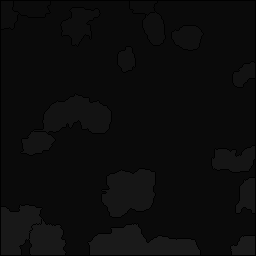

In [52]:
import skimage
from skimage import color

from matplotlib import pyplot as plt
img =  X_test[randTest]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 10)
sure_bg = cv2.dilate(opening,kernel,iterations=3)   
#  identifying the sure background

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)  # using distance transform
ret, sure_fg = cv2.threshold(dist_transform,0.5*dist_transform.max(),255,0)   # thresholding as 0.5 dist_transform
# Finding unknown region  it calcs background - foreground
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Markers we need to mark and label
ret, markers = cv2.connectedComponents(sure_fg)
# adding bias in pixel
markers = markers+10
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
# watershed segenting
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]   # marking boundry in blue
from skimage.color import label2rgb

cv2_imshow(img)
cv2_imshow( markers)

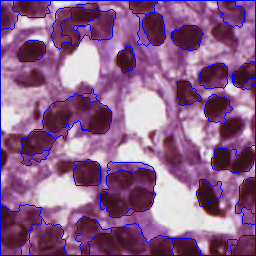

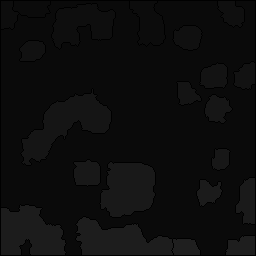

In [54]:
#Importing few more Libraries 
import skimage
from skimage import color

testImage = X_test[randTest]
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 10)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.2*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+10
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
from skimage.color import label2rgb

cv2_imshow(img)
cv2_imshow( markers)

#Reference : https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html

<h3>Submitted by: </h3>
<h2>Samarth Bansal (200070073) & Umang Babu (200070085)</h2>

References: 
<ol>
<li><a> https://github.com/bnsreenu/python_for_microscopists/blob/master/074-Defining%20U-net%20in%20Python%20using%20Keras.py</a></li>
<li><a>https://stackoverflow.com/questions/63303109/finding-all-files-associated-with-an-id-within-a-folder-of-images<a></li>
<li><a>https://colab.research.google.com/github/bebi103a/bebi103a.github.io/blob/master/lessons/03/file_io.ipynb#scrollTo=DrLfMwy1QNEO</a></li>
<li><a>https://www.kaggle.com/code/bigironsphere/loss-function-library-keras-pytorch/notebook</a></li>
<li><a>https://towardsdatascience.com/loading-custom-image-dataset-for-deep-learning-models-part-1-d64fa7aaeca6</a></li>
<li><a>https://docs.opencv.org/4.x/d3/db4/tutorial_py_watershed.html</a></li>
</ol>